In [1]:
import sys
sys.path.append("/s/ls4/users/grartem/RL_robots/continuous-grid-arctic/")
sys.path.append("/s/ls4/users/grartem/RL_robots/RL_robotSim/")
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"

In [2]:
os.chdir("/s/ls4/users/grartem/RL_robots/RL_robotSim/")

In [3]:
import time
import gym
import pyhocon
import numpy as np
import pandas as pd
import ray
from ray.rllib.agents.ppo.ppo import PPOTrainer
from ray.rllib.agents.ddpg.td3 import TD3Trainer
import pygame
import matplotlib.pyplot as plt
%matplotlib inline

import MyMisc

/s/ls4/users/grartem/anaconda3/envs/rl_robots/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Couldn't import `requests` library. Be sure to install it on the client side.
Traceback (most recent call last):
  File "/s/ls4/users/grartem/anaconda3/envs/rl_robots/lib/python3.8/site-packages/ray/tune/web_server.py", line 16, in <module>
    import requests  # `requests` is not part of stdlib.
  File "/s/ls4/users/grartem/.local/lib/python3.8/site-packages/requests/__init__.py", line 43, in <module>
    import urllib3
ModuleNotFoundError: No module named 'urllib3'
Couldn't import `requests` library. Be sure to install it on the client side.


pygame 2.1.2 (SDL 2.0.16, Python 3.8.0)
Hello from the pygame community. https://www.pygame.org/contribute.html


# Prepare env and model

In [4]:
configs = pyhocon.ConfigFactory.parse_file("/s/ls4/users/grartem/RL_robots/RL_robotSim/Configs/FollowerContinuous/PPO_obst.conf")
CONFIG = configs["ppo_env4feats10v7_train5v2"].as_plain_ordered_dict()
CONFIG["config"]["num_workers"]=1

In [5]:
CONFIG["config"]["env_config"]

OrderedDict([('name', 'Test-Cont-Env-Auto-v0'),
             ('base_env_config',
              OrderedDict([('add_obstacles', True),
                           ('warm_start', 0),
                           ('max_steps', 10000),
                           ('framerate', 5000),
                           ('obstacle_number', 35),
                           ('constant_follower_speed', False),
                           ('early_stopping',
                            OrderedDict([('max_distance_coef', 1.4),
                                         ('low_reward', -300)])),
                           ('random_frames_per_step', [2, 20]),
                           ('leader_speed_regime',
                            OrderedDict([('0', [0.2, 1]),
                                         ('200', 1),
                                         ('1000', [0.5, 1]),
                                         ('1500', 0.75),
                                         ('2000', 0),
                              

In [6]:
EXPERIMENT_DIR = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_11042022_env5483ef7a5c89448cd46564db5dc50c7e8f57ca5e//obst_dynLSpd_dynFPS/PPO/env4feats10v7_train/ppo_env4feats10v7_train5v2/PPO_continuous-grid_0a7bf_00000_0_2022-04-12_15-49-50/"
checkpoint_path = EXPERIMENT_DIR + "/checkpoint_000600/checkpoint-600"

In [7]:
trainer = ray.rllib.agents.registry.get_trainer_class(CONFIG["run"])(CONFIG["config"])
trainer.restore(checkpoint_path)

env = MyMisc.continuous_env_maker(config=CONFIG["config"]["env_config"])

(pid=4284) 2022-05-18 13:18:50,939	ERROR web_server.py:19 -- Couldn't import `requests` library. Be sure to install it on the client side.
(pid=4284) Traceback (most recent call last):
(pid=4284)   File "/s/ls4/users/grartem/anaconda3/envs/rl_robots/lib/python3.8/site-packages/ray/tune/web_server.py", line 16, in <module>
(pid=4284)     import requests  # `requests` is not part of stdlib.
(pid=4284)   File "/s/ls4/users/grartem/.local/lib/python3.8/site-packages/requests/__init__.py", line 43, in <module>
(pid=4284)     import urllib3
(pid=4284) ModuleNotFoundError: No module named 'urllib3'
(pid=4284) 2022-05-18 13:18:51,386	WARNING policy_client.py:28 -- Couldn't import `requests` library. Be sure to install it on the client side.


(RolloutWorker pid=4284) pygame 2.1.2 (SDL 2.0.16, Python 3.8.0)
(RolloutWorker pid=4284) Hello from the pygame community. https://www.pygame.org/contribute.html


(RolloutWorker pid=4284) /s/ls4/users/grartem/RL_robots/continuous_grid_arctic/continuous_grid_arctic/follow_the_leader_continuous_env.py:279: UserWarning: Одновременно заданы и random_frames_per_step и frames_per_step, будет использоваться random_frames_per_step
(RolloutWorker pid=4284)   warn(
(RolloutWorker pid=4284) /s/ls4/users/grartem/anaconda3/envs/rl_robots/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
(RolloutWorker pid=4284)   logger.warn(


(RolloutWorker pid=4284) ===Запуск симуляции номер 0===


(RolloutWorker pid=4284) Failed to create secure directory (/run/user/1556/pulse): No such file or directory
(RolloutWorker pid=4284) ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
(RolloutWorker pid=4284) ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
(RolloutWorker pid=4284) ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
(RolloutWorker pid=4284) ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
(RolloutWorker pid=4284) ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
(RolloutWorker pid=4284) ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
(RolloutWorker pid=4284) ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
(RolloutWorker pid=4284) ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default
2022-05-18 13:18:5

# Test episode

In [8]:
# Start env episode
seed_i = 0
env.seed(seed_i)
obs = env.reset()
done = False
total_reward = 0.0

===Запуск симуляции номер 0===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


In [9]:
# run N steps
NNobs_history, raw_obs_history, reward_history, info_history, actions_hist = [], [], [], [], []
start_time = time.time()
for i in range(50):
    # Compute a single action, given the current observation
    # from the environment.
    NNobs_history.append(obs)
    raw_obs = env.env.env._get_obs()
    raw_obs_history.append({
        'LeaderTrackDetector_radar': raw_obs['LeaderTrackDetector_radar'],
        'LaserSensor': raw_obs['LaserSensor']
    })
    
    action = trainer.compute_single_action(obs, explore=False)
    # Apply the computed action in the environment.
    obs, reward, done, info = env.step(action)
    
    actions_hist.append(action)
    reward_history.append(reward)
    info_history.append(info)
    # Sum up rewards for reporting purposes.
    total_reward += reward
elapsed_time = time.time() - start_time
elapsed_time = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))
print(elapsed_time)

00:00:03


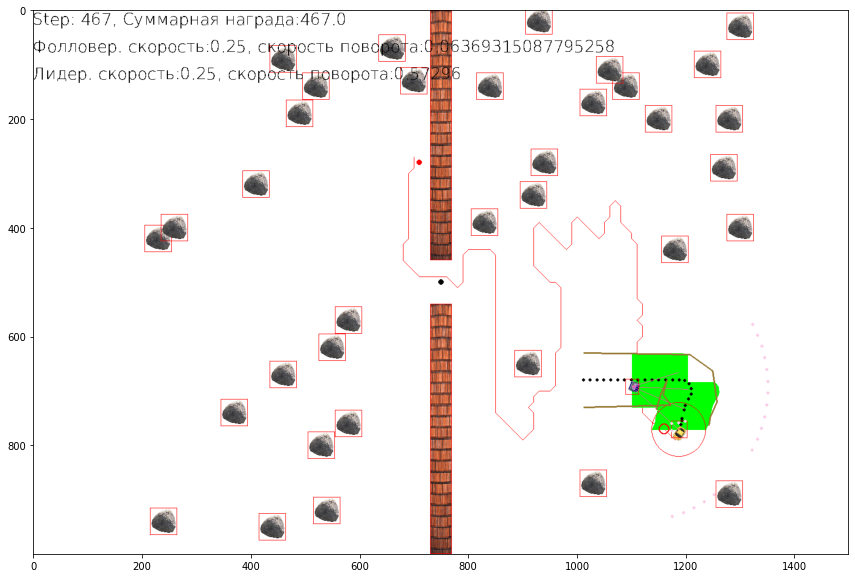

In [10]:
env.render()
plt.figure(figsize=(15,10))
plt.imshow(pygame.surfarray.array3d(env.gameDisplay).transpose((1,0,2)))

In [11]:
for i in range(len(raw_obs_history)):
    print("Raw observes:")
    print(raw_obs_history[i])
    print("NN inputs:")
    print(NNobs_history[i])
    print("Action:")
    print(actions_hist[i])
    print("Reward:")
    print(reward_history[i])
    print("Info:")
    print(info_history[i])
    print("#"*50)

Raw observes:
{'LeaderTrackDetector_radar': array([  0.,   0.,   0.,   0., 178.,   0.,   0.,   0.,   0.],
      dtype=float32), 'LaserSensor': array([166.66662598, 250.00003183, 250.00003183, 249.99996724,
       249.99996724, 249.99999215, 249.99999215, 249.99995438,
       249.99995438, 249.9999512 , 249.9999512 , 249.99999715,
       249.99999715, 249.99995842, 249.99995842, 249.99999624,
       249.99999624, 250.0000323 , 250.00001073, 249.99999624,
       249.99999624])}
NN inputs:
[0.         0.         0.         0.         0.88999999 0.
 0.         0.         0.         0.6666665  1.         1.
 0.99999987 0.99999987 0.99999997 0.99999997 0.99999982 0.99999982
 0.9999998  0.9999998  0.99999999 0.99999999 0.99999983 0.99999983
 0.99999998 0.99999998 1.         1.         0.99999998 0.99999998]
Action:
[0.7271341  0.23322004]
Reward:
1.0
Info:
{'mission_status': 'in_progress', 'agent_status': 'moving', 'leader_status': 'moving'}
##################################################
